In [7]:
# 1. Importing Pandas & Creating a DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Sample DataFrame
data = {
    'Date': ['2024-01-01','2024-01-02','2024-01-03','2024-01-04',None],
    'Product': ['Laptop','Mobile','Laptop','Tablet','Laptop'],
    'Price': [80000, 30000, None, 20000, 80000],
    'Quantity': [5, 10, 7, None, 5],
    'City': ['Delhi','Mumbai','Delhi','Chennai','Delhi']
}

In [9]:
df = pd.DataFrame(data)
print(df)

         Date Product    Price  Quantity     City
0  2024-01-01  Laptop  80000.0       5.0    Delhi
1  2024-01-02  Mobile  30000.0      10.0   Mumbai
2  2024-01-03  Laptop      NaN       7.0    Delhi
3  2024-01-04  Tablet  20000.0       NaN  Chennai
4        None  Laptop  80000.0       5.0    Delhi


# 2. Data Cleaning

In [10]:
# 2.1 Handling Missing Values
# Check missing values
df.isnull().sum()

Date        1
Product     0
Price       1
Quantity    1
City        0
dtype: int64

In [11]:
# Fill missing values
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

In [ ]:
# Correct Way to Use Mode with fillna()
# Example DataFrame
import pandas as pd

df = pd.DataFrame({
    'City': ['Delhi', None, 'Mumbai', 'Delhi', None]
})
#Explanation:
# df['City'].mode() → returns list of most frequent value
# df['City'].mode()[0] → selects first (most common) value
# fillna() fills missing values using that mode value

In [ ]:
# Fill NA using Mode
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [ ]:
#  2. Fill NA for Multiple Columns Using Mode
# If you want to fill NAs for multiple columns:

df = df.fillna(df.mode().iloc[0])

In [ ]:
# ✔ df.mode().iloc[0] gives the first row of the mode DataFrame
# ✔ Pandas will match column names and fill missing values accordingly
# Example Before & After
# Before:
# City
# Delhi
# NaN
# Mumbai
# Delhi
# NaN

# After fillna(mode):
# City
# Delhi
# Delhi
# Mumbai
# Delhi
# Delhi
# [the Key-formula]=> fillna(mode) → fillna(column.mode()[0])

In [12]:
# Drop rows with missing Date
df = df.dropna(subset=['Date'])

In [13]:
# 2.2 Convert Data Types
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# 2.3 Remove Duplicates
df = df.drop_duplicates()

 <!-- 3. Data Analysis -->

In [15]:
# 3.1 Statistical Summary
df.describe()

,Date,Price,Quantity
count,4,4.000000,4.000000
mean,2024-01-02 12:00:00,45625.000000,7.000000
min,2024-01-01 00:00:00,20000.000000,5.000000
25%,2024-01-01 18:00:00,27500.000000,5.750000
50%,2024-01-02 12:00:00,41250.000000,6.500000
75%,2024-01-03 06:00:00,59375.000000,7.750000
max,2024-01-04 00:00:00,80000.000000,10.000000
std,NaN,26643.870465,2.160247


In [16]:
# 3.2 Count Products
df['Product'].value_counts()

Product
Laptop    2
Mobile    1
Tablet    1
Name: count, dtype: int64

In [17]:
# 3.3 Correlation
df[['Price','Quantity']].corr()

,Price,Quantity
Price,1.000000,-0.521219
Quantity,-0.521219,1.000000


4. Data Transformation

In [21]:
# 4.1 Add New Columns
# Total Revenue
df['Revenue'] = df['Price'] * df['Quantity']

In [22]:
# 4.2 Apply Function
df['High_Price'] = df['Price'].apply(lambda x: 'Yes' if x > 50000 else 'No')

In [23]:
# 4.3 Rename Columns
df = df.rename(columns={'City':'Location'})

In [24]:
# 4.4 Replace Values
df['Location'] = df['Location'].replace({'Delhi':'DEL','Mumbai':'MUM','Chennai':'CHE'})

# 5. Data Filtering

In [25]:
# 5.1 Filter Rows
# Price above 50k
df[df['Price'] > 50000]

,Date,Product,Price,Quantity,Location,Revenue,High_Price
0,2024-01-01,Laptop,80000.0,5.0,DEL,400000.0,Yes
2,2024-01-03,Laptop,52500.0,7.0,DEL,367500.0,Yes


In [26]:
# Product = Laptop
df[df['Product'] == 'Laptop']

,Date,Product,Price,Quantity,Location,Revenue,High_Price
0,2024-01-01,Laptop,80000.0,5.0,DEL,400000.0,Yes
2,2024-01-03,Laptop,52500.0,7.0,DEL,367500.0,Yes


In [27]:
# Multiple conditions
df[(df['Price'] > 30000) & (df['Location']=='DEL')]

,Date,Product,Price,Quantity,Location,Revenue,High_Price
0,2024-01-01,Laptop,80000.0,5.0,DEL,400000.0,Yes
2,2024-01-03,Laptop,52500.0,7.0,DEL,367500.0,Yes


6. Data Aggregation

In [28]:
# 6.1 Group by Product
df.groupby('Product')['Revenue'].sum()

Product
Laptop    767500.0
Mobile    300000.0
Tablet    120000.0
Name: Revenue, dtype: float64

In [29]:
# 6.2 Group by Product & Location
df.groupby(['Product','Location'])['Quantity'].sum()

Product  Location
Laptop   DEL         12.0
Mobile   MUM         10.0
Tablet   CHE          6.0
Name: Quantity, dtype: float64

7. Data Visualization (Using Matplotlib)

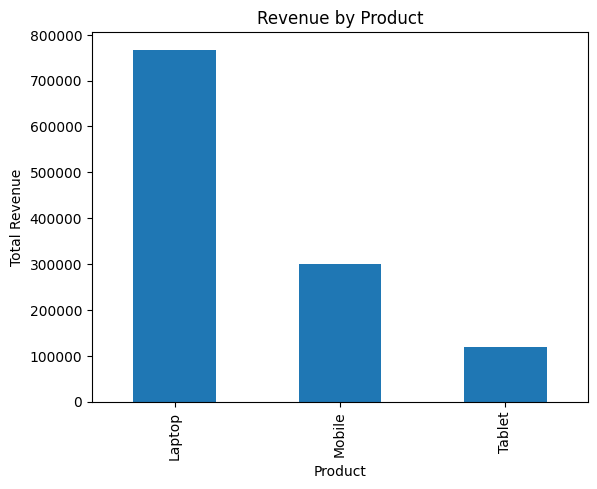

In [30]:
# (No color specified as per Python rules)

# 7.1 Bar Chart – Revenue by Product
plt.figure()
df.groupby('Product')['Revenue'].sum().plot(kind='bar')
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.title("Revenue by Product")
plt.show()

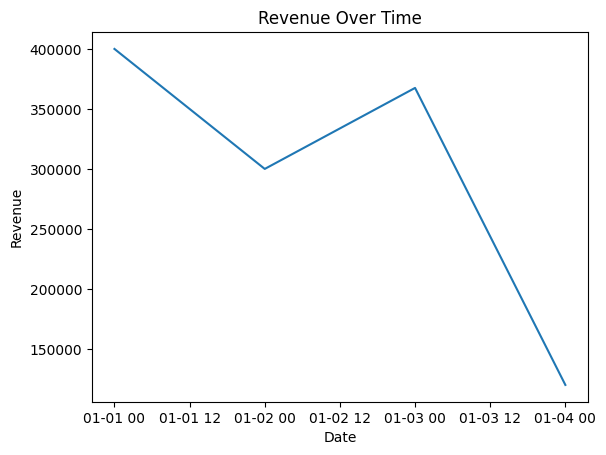

In [31]:
# 7.2 Line Chart – Date vs Revenue
plt.figure()
plt.plot(df['Date'], df['Revenue'])
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue Over Time")
plt.show()

8. Time Series Analysis

In [32]:
# 8.1 Sort by Date
df = df.sort_values('Date')

In [33]:
# 8.2 Set Date as Index
df_ts = df.set_index('Date')

In [34]:
# 8.3 Resampling (Weekly Revenue)
df_ts['Revenue'].resample('W').sum()

Date
2024-01-07    1187500.0
Freq: W-SUN, Name: Revenue, dtype: float64

9. File Handling

In [ ]:
# 9.1 CSV
# Save to CSV
df.to_csv('sales_data.csv', index=False)

In [ ]:
# Read from CSV
df2 = pd.read_csv('sales_data.csv')

In [ ]:
# 9.2 Excel
# Save
df.to_excel('sales_data.xlsx', index=False)

In [ ]:
# Read
df3 = pd.read_excel('sales_data.xlsx')

In [ ]:
# 9.3 JSON
df.to_json('sales_data.json', orient='records')

In [35]:
# 1. pd.merge() Examples
# Sample DataFrames
import pandas as pd

left = pd.DataFrame({
    'ID': [1,2,3,4],
    'Name': ['A','B','C','D']
})

In [36]:
right = pd.DataFrame({
    'ID': [3,4,5],
    'Salary': [20000,25000,30000]
})

In [37]:
# 1.1 INNER JOIN (Common values only)
pd.merge(left, right, on='ID', how='inner')
# Output: Only ID 3 & 4

,ID,Name,Salary
0,3,C,20000
1,4,D,25000


In [38]:
# 1.2 LEFT JOIN (All left rows + matching right rows)
pd.merge(left, right, on='ID', how='left')
# Output: IDs 1,2 have NaN salary.

,ID,Name,Salary
0,1,A,NaN
1,2,B,NaN
2,3,C,20000.0
3,4,D,25000.0


In [39]:
# 1.3 RIGHT JOIN (All right rows + matching left rows)
pd.merge(left, right, on='ID', how='right')

,ID,Name,Salary
0,3,C,20000
1,4,D,25000
2,5,NaN,30000


In [40]:
# 1.4 OUTER JOIN (All rows from both tables)
pd.merge(left, right, on='ID', how='outer')
# Output: IDs 1,2,3,4,5 appear.

,ID,Name,Salary
0,1,A,NaN
1,2,B,NaN
2,3,C,20000.0
3,4,D,25000.0
4,5,NaN,30000.0


In [41]:
# 2. pd.concat() Examples
# Sample Data
df1 = pd.DataFrame({'A':[1,2], 'B':[3,4]})
df2 = pd.DataFrame({'A':[5,6], 'B':[7,8]})

In [42]:
# 2.1 Row-wise Concat (axis=0)
# (Add rows)
pd.concat([df1, df2], axis=0)

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


In [43]:
# 2.2 Column-wise Concat (axis=1)
# (Add columns)
pd.concat([df1, df2], axis=1)

,A,B,A,B
0,1,3,5,7
1,2,4,6,8


In [44]:
 # 3. Joining DataFrames (Using join())
# Sample DataFrames
left = pd.DataFrame({'A':[1,2,3]}, index=['X','Y','Z'])
right = pd.DataFrame({'B':[4,5,6]}, index=['X','Y','Z'])

In [45]:
# 3.1 Column Join
left.join(right)

,A,B
X,1,4
Y,2,5
Z,3,6


In [46]:
# 3.2 Join with different join types
left.join(right, how='outer')

,A,B
X,1,4
Y,2,5
Z,3,6


In [47]:
#  4. Aggregation with Multiple Functions
# Sample Data
df = pd.DataFrame({
    'Category': ['A','A','B','B','B'],
    'Sales': [100,200,300,400,500],
    'Profit': [10,20,30,40,50]
})

In [48]:
# 4.1 Using agg() with multiple functions
df.groupby('Category').agg({
    'Sales': ['sum','mean','max'],
    'Profit': ['sum','min']
})

Sales             Profit    
           sum   mean  max    sum min
Category                             
A          300  150.0  200     30  10
B         1200  400.0  500    120  30

In [49]:
# 5. Pivot Table
# Sample Data
df = pd.DataFrame({
    'City':['Delhi','Delhi','Mumbai','Mumbai','Chennai'],
    'Product':['Laptop','Mobile','Laptop','Mobile','Laptop'],
    'Sales':[80,40,60,30,50]
})

In [50]:
# 5.1 Pivot Table Example
pd.pivot_table(df, values='Sales', index='City', columns='Product', aggfunc='sum')
# Output:
# A table showing Sales grouped by City & Product.

Product,Laptop,Mobile
City,,
Chennai,50.0,NaN
Delhi,80.0,40.0
Mumbai,60.0,30.0


In [51]:
 # 6. Crosstab
# Sample Data
df = pd.DataFrame({
    'Gender':['M','F','M','M','F'],
    'Purchased':['Yes','No','Yes','No','Yes']
})

In [52]:
# 6.1 Crosstab Example
pd.crosstab(df['Gender'], df['Purchased'])

Purchased,No,Yes
Gender,,
F,1,1
M,1,2
